In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

from torchvision import transforms, datasets
import torchvision.transforms.functional as fn
from PIL import Image


tensor([[[0.2941, 0.3020, 0.3137,  ..., 0.0392, 0.0510, 0.0549],
         [0.2902, 0.3059, 0.2980,  ..., 0.0471, 0.0510, 0.0549],
         [0.2980, 0.3098, 0.2784,  ..., 0.0863, 0.1020, 0.0902],
         ...,
         [0.4157, 0.4118, 0.3961,  ..., 0.4980, 0.5333, 0.6392],
         [0.4706, 0.4745, 0.4157,  ..., 0.5137, 0.6078, 0.5765],
         [0.4667, 0.4745, 0.4784,  ..., 0.5686, 0.5451, 0.6549]],

        [[0.2118, 0.2275, 0.2392,  ..., 0.0471, 0.0471, 0.0510],
         [0.2275, 0.2431, 0.2431,  ..., 0.0549, 0.0549, 0.0510],
         [0.2706, 0.2863, 0.2471,  ..., 0.0941, 0.1020, 0.0902],
         ...,
         [0.3882, 0.3843, 0.3725,  ..., 0.4627, 0.4980, 0.6039],
         [0.4431, 0.4471, 0.3922,  ..., 0.4902, 0.5843, 0.5529],
         [0.4392, 0.4471, 0.4549,  ..., 0.5490, 0.5216, 0.6314]],

        [[0.2314, 0.2431, 0.2471,  ..., 0.0275, 0.0314, 0.0353],
         [0.2275, 0.2431, 0.2392,  ..., 0.0353, 0.0353, 0.0353],
         [0.2314, 0.2392, 0.2039,  ..., 0.0745, 0.0941, 0.

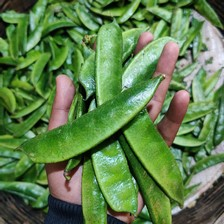

In [2]:
img = Image.open("data/Vegetable Images/test/Bean/0001.jpg")
img_tensor = fn.to_tensor(img)
print(img_tensor)
print(f"Mean: {img_tensor.mean()}\nStd: {img_tensor.std()}")
img


In [42]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [72]:
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

In [73]:
dataset = datasets.ImageFolder('data/Vegetable Images/train', transform=train_transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


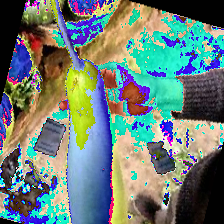

In [100]:
images, labels = next(iter(dataloader))
fn.to_pil_image(images[0])

In [34]:
print(labels)

tensor([ 5,  2,  0, 13,  9,  0, 11,  2,  6, 11,  2,  0,  7,  7, 10,  6, 11, 14,
        12, 13,  8, 12, 11, 10,  2,  2,  9, 12,  4,  1, 14, 13])
